# Description
A python notebook made to compare data (Rays) gathered from old RAY-UI and new RAY-X to check for correctness or possible deviations. 

Please do note the used paths. 

_by Oussama Sayari_

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Get old and new output

In [ ]:
old_df = pd.read_csv('oldray_files/ImagePlane-RawRaysBeam.csv',sep=';')
new_df = pd.read_csv('output/output.csv',sep=';')
old_df = old_df[['ImagePlane_OX','ImagePlane_OY','ImagePlane_OZ','ImagePlane_DX','ImagePlane_DY','ImagePlane_DZ']]
new_df = new_df[['Xloc','Yloc','Zloc','Xdir','Ydir','Zdir']]
print("Old data-frame: ", old_df.shape)
print("New data-frame: ", new_df.shape)   
if (old_df.shape != new_df.shape):
    print("Some rays are missing!")

Old data-frame:  (400000, 6)
New data-frame:  (400000, 6)


# Plot Scatter (Normal)

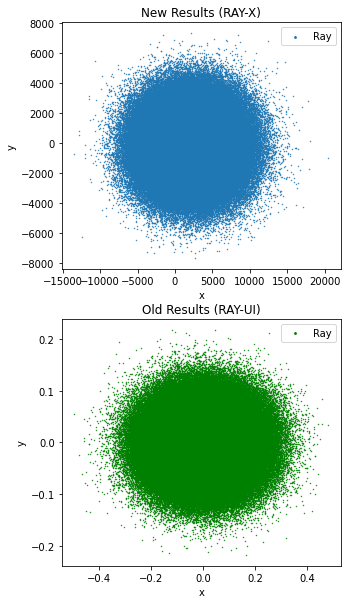

Data Summary:
Old:
X: 	 std:  0.10893130404169864  ,mean:  0.00047404267760857964
	 std/mean:  229.79218789166484
Y: 	 std:  0.048391380445357714  ,mean:  -9.321249751253216e-05
	 std/mean:  -519.1512054362842
New
X: 	 std:  3307.5938787221326  ,mean:  1982.6896853354192
	 std/mean:  1.668235782526187
Y: 	 std:  1680.625029788399  ,mean:  -100.31531773543078
	 std/mean:  -16.753423781409328


In [ ]:
f = plt.figure(figsize=(5,10))
plt.subplot(2,1,1)
plt.scatter(new_df['Xloc'],new_df['Yloc'],s=0.2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('New Results (RAY-X)')
plt.legend(['Ray'],markerscale=4)
plt.subplot(2,1,2)
plt.scatter(old_df['ImagePlane_OX'],old_df['ImagePlane_OY'],s=0.2,color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Old Results (RAY-UI)')
plt.legend(['Ray'],markerscale=4)
plt.show()

print("Data Summary:")
print("Old:")
print("X: \t std: ", old_df['ImagePlane_OX'].std(), " ,mean: ",old_df['ImagePlane_OX'].mean())
print("\t std/mean: ", old_df['ImagePlane_OX'].std()/old_df['ImagePlane_OX'].mean())
print("Y: \t std: ", old_df['ImagePlane_OY'].std(), " ,mean: ",old_df['ImagePlane_OY'].mean())
print("\t std/mean: ", old_df['ImagePlane_OY'].std()/old_df['ImagePlane_OY'].mean())

print("New")
print("X: \t std: ", new_df['Xloc'].std(), " ,mean: ",new_df['Xloc'].mean())
print("\t std/mean: ", new_df['Xloc'].std()/new_df['Xloc'].mean())
print("Y: \t std: ", new_df['Yloc'].std(), " ,mean: ",new_df['Yloc'].mean())
print("\t std/mean: ", new_df['Yloc'].std()/new_df['Yloc'].mean())

# With scaling (Standarization)
Scaling is trying to make all units "look the same or have a universal length" to be compared.

__Formula:__

Scaled_Data = (Data - Data.mean)/Data.StandardDeviation

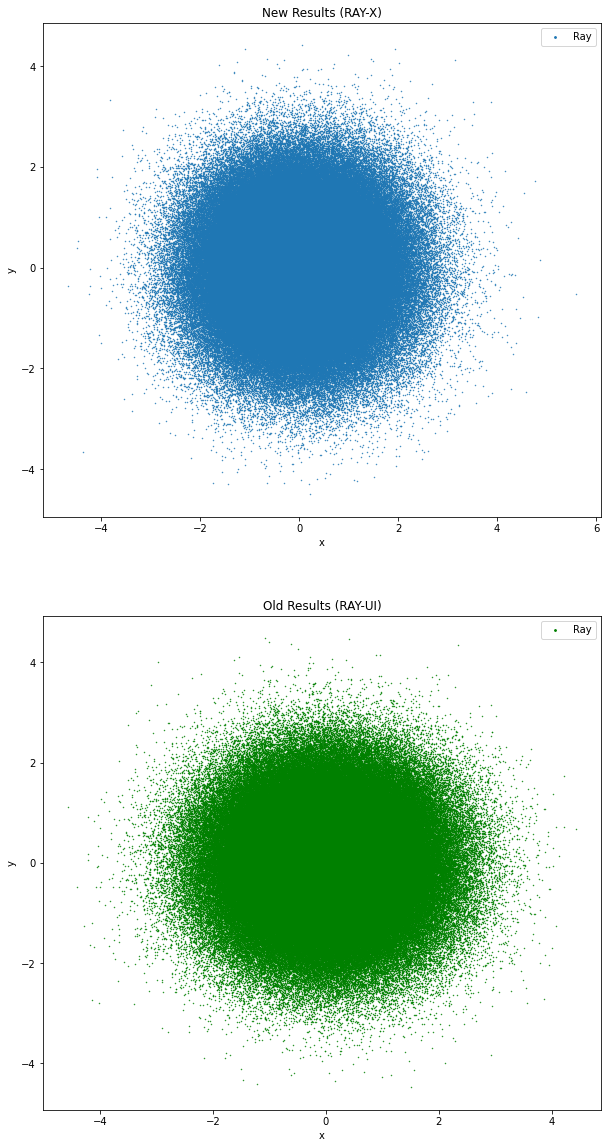

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale
scale = StandardScaler()
old_df_scaled = scale.fit_transform(old_df)
new_df_scaled = scale.fit_transform(new_df)
old_df_scaled = pd.DataFrame(old_df_scaled,columns=old_df.columns)
new_df_scaled = pd.DataFrame(new_df_scaled,columns=new_df.columns)

# Plot
f = plt.figure(figsize=(10, 20))
plt.subplot(2, 1, 1)
plt.scatter(new_df_scaled['Xloc'], new_df_scaled['Yloc'], s=0.2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('New Results (RAY-X)')
plt.legend(['Ray'], markerscale=4)
plt.subplot(2, 1, 2)
plt.scatter(old_df_scaled['ImagePlane_OX'],
            old_df_scaled['ImagePlane_OY'], s=0.2, color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Old Results (RAY-UI)')
plt.legend(['Ray'], markerscale=4)
plt.show()
